In [ ]:
import _pickle as pickle

import numpy as np
import pandas as pd

import mxnet as mx
from mxnet import nd

"""
Load the model data
"""
with open('ecLogPrepare_grenoble.pkl', 'rb') as f:
    [trainXDt,trainX2Dt, trainYDt,testXDt, testX2Dt,testYDt] = pickle.load(f)
# cpu or gpu
modelCtx = mx.gpu() if mx.context.num_gpus() else mx.cpu()
dataCtx = mx.gpu() if mx.context.num_gpus() else mx.cpu()

"""
The model training
"""
from MxnetModels.pointModels import TCN
from MxnetModels.pointTrainer import nnTrainer
# The models
inputSize=168
outputSize=24
dilations = [1,2,4,8,16,20,32]
nResidue = 11
actType='relu'
dropout=0.2
model1 = TCN(inputSize, outputSize, dilations,nResidue, actType, dropout)

mlpTrainer = nnTrainer(model1, dataCtx, modelCtx)

"""
define the trainer
"""
from mxnet.gluon.loss import L2Loss, L1Loss, HuberLoss

epochs = 200
esEpochs = 30
evalCriteria = 'min'

batchSize = 64
learningRate = 0.01
sampleRate = 0.8

initializer = mx.init.Xavier(magnitude=2.24)
initializer = mx.initializer.MSRAPrelu()
optimizer = 'adam';
lossFunc = HuberLoss() #Which is robust to outlier

paramsList = {'epochs': epochs, 'esEpochs': esEpochs, 'evalCriteria': evalCriteria,
        'batchSize': batchSize, 'learningRate': learningRate, 'sampleRate': sampleRate,
                    'initializer': initializer, 'optimizer':optimizer, 'lossFunc': lossFunc}

##The model traning
trainingMark='logTransform'
trainHistory = mlpTrainer.fit(trainingMark,trainXDt,trainX2Dt, trainYDt, testXDt, testX2Dt,testYDt, paramsList)


epochs:   0%|▎                                                                         | 1/200 [00:04<14:30,  4.37s/it]

Epoch 1 / 200. Training Loss: 0.06576008093161662.
Epoch 1 / 200. Testing loss: 0.08415733. Testing ND: 1.0. Test SMAPE: 200.0. Test NRMSE: 1.4130457519551602


epochs:   1%|▋                                                                         | 2/200 [00:08<13:12,  4.00s/it]

Epoch 2 / 200. Training Loss: 0.06005137715333648.
Epoch 2 / 200. Testing loss: 0.08415733. Testing ND: 1.0. Test SMAPE: 200.0. Test NRMSE: 1.4130457519551602


epochs:   2%|█                                                                         | 3/200 [00:11<12:48,  3.90s/it]

Epoch 3 / 200. Training Loss: 0.05873852720176437.
Epoch 3 / 200. Testing loss: 0.08415733. Testing ND: 1.0. Test SMAPE: 200.0. Test NRMSE: 1.4130457519551602


epochs:   2%|█▍                                                                        | 4/200 [00:15<12:29,  3.82s/it]

Epoch 4 / 200. Training Loss: 0.057055778190737864.
Epoch 4 / 200. Testing loss: 0.08415733. Testing ND: 1.0. Test SMAPE: 200.0. Test NRMSE: 1.4130457519551602


epochs:   2%|█▊                                                                        | 5/200 [00:19<12:23,  3.81s/it]

Epoch 5 / 200. Training Loss: 0.049218634488753986.
Epoch 5 / 200. Testing loss: 0.08415733. Testing ND: 1.0. Test SMAPE: 200.0. Test NRMSE: 1.4130457519551602


epochs:   3%|██▏                                                                       | 6/200 [00:23<12:30,  3.87s/it]

Epoch 6 / 200. Training Loss: 0.03670857081948433.
Epoch 6 / 200. Testing loss: 0.0782234. Testing ND: 0.9583345544155651. Test SMAPE: 194.52714890916727. Test NRMSE: 1.3702041095425437


epochs:   4%|██▌                                                                       | 7/200 [00:27<12:44,  3.96s/it]

Epoch 7 / 200. Training Loss: 0.027577961528436532.
Epoch 7 / 200. Testing loss: 0.06675251. Testing ND: 0.8842868569322307. Test SMAPE: 182.2996107891192. Test NRMSE: 1.288043281742377


epochs:   4%|██▉                                                                       | 8/200 [00:31<12:34,  3.93s/it]

Epoch 8 / 200. Training Loss: 0.02612294916246758.
Epoch 8 / 200. Testing loss: 0.044042338. Testing ND: 0.7091069664806618. Test SMAPE: 168.98922617285973. Test NRMSE: 1.0169513447596574


epochs:   4%|███▎                                                                      | 9/200 [00:34<12:04,  3.79s/it]

Epoch 9 / 200. Training Loss: 0.024023119468256023.
Epoch 9 / 200. Testing loss: 0.041623753. Testing ND: 0.7033481718931679. Test SMAPE: 164.6480427173624. Test NRMSE: 1.008569997264071


epochs:   5%|███▋                                                                     | 10/200 [00:38<12:00,  3.79s/it]

Epoch 10 / 200. Training Loss: 0.025239563830112298.
Epoch 10 / 200. Testing loss: 0.02759059. Testing ND: 0.5489788162464856. Test SMAPE: 147.96763107382287. Test NRMSE: 0.8002311973584955


epochs:   6%|████                                                                     | 11/200 [00:42<12:04,  3.83s/it]

Epoch 11 / 200. Training Loss: 0.025072045614860698.
Epoch 11 / 200. Testing loss: 0.035347093. Testing ND: 0.615946572633279. Test SMAPE: 156.59323147213345. Test NRMSE: 0.9178653538935313


epochs:   6%|████▍                                                                    | 12/200 [00:46<12:03,  3.85s/it]

Epoch 12 / 200. Training Loss: 0.024221763334238214.
Epoch 12 / 200. Testing loss: 0.033728942. Testing ND: 0.6183153159488293. Test SMAPE: 155.19289269906557. Test NRMSE: 0.9050541844956869


epochs:   6%|████▋                                                                    | 13/200 [00:50<12:14,  3.93s/it]

Epoch 13 / 200. Training Loss: 0.022786246121756518.
Epoch 13 / 200. Testing loss: 0.024388507. Testing ND: 0.5018761553582833. Test SMAPE: 142.90718444693215. Test NRMSE: 0.7467753525076778


epochs:   7%|█████                                                                    | 14/200 [00:54<12:23,  4.00s/it]

Epoch 14 / 200. Training Loss: 0.023483651583311987.
Epoch 14 / 200. Testing loss: 0.02241248. Testing ND: 0.4885057047129081. Test SMAPE: 139.28282976277762. Test NRMSE: 0.7156058583750962


epochs:   8%|█████▍                                                                   | 15/200 [00:58<12:15,  3.98s/it]

Epoch 15 / 200. Training Loss: 0.022510378989115037.
Epoch 15 / 200. Testing loss: 0.022799267. Testing ND: 0.5125554636250033. Test SMAPE: 137.99550852126538. Test NRMSE: 0.742399892352063


epochs:   8%|█████▊                                                                   | 16/200 [01:02<12:09,  3.96s/it]

Epoch 16 / 200. Training Loss: 0.021140624716182676.
Epoch 16 / 200. Testing loss: 0.02211318. Testing ND: 0.4995362217988021. Test SMAPE: 133.63143012527564. Test NRMSE: 0.72462536086408


epochs:   8%|██████▏                                                                  | 17/200 [01:06<12:03,  3.95s/it]

Epoch 17 / 200. Training Loss: 0.021974266702861234.
Epoch 17 / 200. Testing loss: 0.022112152. Testing ND: 0.4998316214400784. Test SMAPE: 130.68264943893988. Test NRMSE: 0.7265862569354788


epochs:   9%|██████▌                                                                  | 18/200 [01:10<11:54,  3.93s/it]

Epoch 18 / 200. Training Loss: 0.021404243357395013.
Epoch 18 / 200. Testing loss: 0.022925183. Testing ND: 0.5233231522141535. Test SMAPE: 130.56385309413992. Test NRMSE: 0.7465844139919628


epochs:  10%|██████▉                                                                  | 19/200 [01:14<11:54,  3.95s/it]

Epoch 19 / 200. Training Loss: 0.02134849309620611.
Epoch 19 / 200. Testing loss: 0.022174621. Testing ND: 0.5053541998669641. Test SMAPE: 127.65525184686356. Test NRMSE: 0.7241921181973341


epochs:  10%|███████▎                                                                 | 20/200 [01:18<11:46,  3.93s/it]

Epoch 20 / 200. Training Loss: 0.02004764209328804.
Epoch 20 / 200. Testing loss: 0.026406748. Testing ND: 0.5768686710737171. Test SMAPE: 133.69766534171777. Test NRMSE: 0.8211720204138333


epochs:  10%|███████▋                                                                 | 21/200 [01:22<11:44,  3.94s/it]

Epoch 21 / 200. Training Loss: 0.02064393567858548.
Epoch 21 / 200. Testing loss: 0.03447572. Testing ND: 0.6287144921952589. Test SMAPE: 137.72651337856203. Test NRMSE: 0.9251974638006456


epochs:  11%|████████                                                                 | 22/200 [01:26<11:36,  3.92s/it]

Epoch 22 / 200. Training Loss: 0.01958218077843607.
Epoch 22 / 200. Testing loss: 0.027884895. Testing ND: 0.5733287885513914. Test SMAPE: 130.80056290509583. Test NRMSE: 0.8297539130366464


epochs:  12%|████████▍                                                                | 23/200 [01:30<11:41,  3.97s/it]

Epoch 23 / 200. Training Loss: 0.020051357725078493.
Epoch 23 / 200. Testing loss: 0.021136835. Testing ND: 0.5099988415190575. Test SMAPE: 117.76835387486841. Test NRMSE: 0.7175197642331519


epochs:  12%|████████▊                                                                | 24/200 [01:33<11:28,  3.91s/it]

Epoch 24 / 200. Training Loss: 0.020357588350697692.
Epoch 24 / 200. Testing loss: 0.023155304. Testing ND: 0.531254280581996. Test SMAPE: 121.54126197057992. Test NRMSE: 0.7667671639612448


epochs:  12%|█████████▏                                                               | 25/200 [01:37<11:26,  3.93s/it]

Epoch 25 / 200. Training Loss: 0.02000554467810959.
Epoch 25 / 200. Testing loss: 0.024146752. Testing ND: 0.542398494785031. Test SMAPE: 122.38758675428241. Test NRMSE: 0.7847218257805949


epochs:  13%|█████████▍                                                               | 26/200 [01:42<11:53,  4.10s/it]

Epoch 26 / 200. Training Loss: 0.020299233975356344.
Epoch 26 / 200. Testing loss: 0.024346355. Testing ND: 0.5561808881326418. Test SMAPE: 123.265851035023. Test NRMSE: 0.7850224377212726


epochs:  14%|█████████▊                                                               | 27/200 [01:46<11:36,  4.02s/it]

Epoch 27 / 200. Training Loss: 0.01958295060286456.
Epoch 27 / 200. Testing loss: 0.024285447. Testing ND: 0.5461886235052579. Test SMAPE: 124.17382424160486. Test NRMSE: 0.7839488632344669


epochs:  14%|██████████▏                                                              | 28/200 [01:50<11:23,  3.97s/it]

Epoch 28 / 200. Training Loss: 0.01828393712170037.
Epoch 28 / 200. Testing loss: 0.022321833. Testing ND: 0.5186162987069811. Test SMAPE: 118.37690892788355. Test NRMSE: 0.7448914218863589


epochs:  14%|██████████▌                                                              | 29/200 [01:53<11:07,  3.90s/it]

Epoch 29 / 200. Training Loss: 0.02035796424329356.
Epoch 29 / 200. Testing loss: 0.021788238. Testing ND: 0.5133446317145606. Test SMAPE: 115.63466869491985. Test NRMSE: 0.7357338716417594


epochs:  15%|██████████▉                                                              | 30/200 [01:57<11:05,  3.91s/it]

Epoch 30 / 200. Training Loss: 0.020486591592863257.
Epoch 30 / 200. Testing loss: 0.022571009. Testing ND: 0.5174398720425639. Test SMAPE: 116.22138484502787. Test NRMSE: 0.7557996465757019


epochs:  16%|███████████▎                                                             | 31/200 [02:01<11:01,  3.92s/it]

Epoch 31 / 200. Training Loss: 0.017728589371805083.
Epoch 31 / 200. Testing loss: 0.022460675. Testing ND: 0.5193669169726084. Test SMAPE: 117.88751840076928. Test NRMSE: 0.750946048996617


epochs:  16%|███████████▋                                                             | 32/200 [02:05<10:59,  3.93s/it]

Epoch 32 / 200. Training Loss: 0.019224326216708516.
Epoch 32 / 200. Testing loss: 0.022473399. Testing ND: 0.5184875109337637. Test SMAPE: 118.5599788186288. Test NRMSE: 0.7471636631641907


epochs:  16%|████████████                                                             | 33/200 [02:09<10:49,  3.89s/it]

Epoch 33 / 200. Training Loss: 0.018607941281149096.
Epoch 33 / 200. Testing loss: 0.022760546. Testing ND: 0.523715740321443. Test SMAPE: 119.59543536992237. Test NRMSE: 0.7524502851298592


epochs:  17%|████████████▍                                                            | 34/200 [02:13<10:46,  3.89s/it]

Epoch 34 / 200. Training Loss: 0.01899551232856279.
Epoch 34 / 200. Testing loss: 0.022650478. Testing ND: 0.5175854624624207. Test SMAPE: 119.97299044173033. Test NRMSE: 0.7518294402595417


epochs:  18%|████████████▊                                                            | 35/200 [02:17<10:32,  3.83s/it]

Epoch 35 / 200. Training Loss: 0.018773244729108195.
Epoch 35 / 200. Testing loss: 0.023051742. Testing ND: 0.5174395912206835. Test SMAPE: 120.79997490456293. Test NRMSE: 0.7601444943510337


epochs:  18%|█████████████▏                                                           | 36/200 [02:21<10:37,  3.89s/it]

Epoch 36 / 200. Training Loss: 0.019276982748794073.
Epoch 36 / 200. Testing loss: 0.023138834. Testing ND: 0.5179712167548045. Test SMAPE: 120.0373063051583. Test NRMSE: 0.764487935739124


epochs:  18%|█████████████▌                                                           | 37/200 [02:25<10:41,  3.93s/it]

Epoch 37 / 200. Training Loss: 0.01909110765589441.
Epoch 37 / 200. Testing loss: 0.023794468. Testing ND: 0.5271103295934092. Test SMAPE: 118.6833253905215. Test NRMSE: 0.782202022690514


epochs:  19%|█████████████▊                                                           | 38/200 [02:29<10:35,  3.93s/it]

Epoch 38 / 200. Training Loss: 0.018552334281565414.
Epoch 38 / 200. Testing loss: 0.023141319. Testing ND: 0.5236982501192574. Test SMAPE: 117.20347468839745. Test NRMSE: 0.7700092356006197


epochs:  20%|██████████████▏                                                          | 39/200 [02:32<10:28,  3.90s/it]

Epoch 39 / 200. Training Loss: 0.01889345745120343.
Epoch 39 / 200. Testing loss: 0.022369282. Testing ND: 0.518628535090532. Test SMAPE: 118.75984721612987. Test NRMSE: 0.7490294273853146


epochs:  20%|██████████████▌                                                          | 40/200 [02:36<10:20,  3.88s/it]

Epoch 40 / 200. Training Loss: 0.018983894609112158.
Epoch 40 / 200. Testing loss: 0.02355968. Testing ND: 0.5269719909554311. Test SMAPE: 118.60592759376895. Test NRMSE: 0.7752659068931422


epochs:  20%|██████████████▉                                                          | 41/200 [02:40<10:20,  3.90s/it]

Epoch 41 / 200. Training Loss: 0.018876387973751727.
Epoch 41 / 200. Testing loss: 0.024698356. Testing ND: 0.5399759752412293. Test SMAPE: 120.25408345581742. Test NRMSE: 0.7995864258143901


epochs:  21%|███████████████▎                                                         | 42/200 [02:44<10:16,  3.90s/it]

Epoch 42 / 200. Training Loss: 0.019952744132783945.
Epoch 42 / 200. Testing loss: 0.024409348. Testing ND: 0.5363637160789777. Test SMAPE: 119.20750531831831. Test NRMSE: 0.7908143166070023


epochs:  22%|███████████████▋                                                         | 43/200 [02:48<10:07,  3.87s/it]

Epoch 43 / 200. Training Loss: 0.018600484612309766.
Epoch 43 / 200. Testing loss: 0.024165353. Testing ND: 0.5284910010923151. Test SMAPE: 120.42971521077803. Test NRMSE: 0.7852124494244006


epochs:  22%|████████████████                                                         | 44/200 [02:52<10:10,  3.92s/it]

Epoch 44 / 200. Training Loss: 0.017744926531408054.
Epoch 44 / 200. Testing loss: 0.023549238. Testing ND: 0.5267927040379847. Test SMAPE: 121.28199091126494. Test NRMSE: 0.7717674503885305


epochs:  22%|████████████████▍                                                        | 45/200 [02:56<10:06,  3.91s/it]

Epoch 45 / 200. Training Loss: 0.019340089561058323.
Epoch 45 / 200. Testing loss: 0.023086932. Testing ND: 0.5208370013693161. Test SMAPE: 122.6594758628424. Test NRMSE: 0.7591425714483929


epochs:  23%|████████████████▊                                                        | 46/200 [03:00<10:02,  3.91s/it]

Epoch 46 / 200. Training Loss: 0.01849321850010606.
Epoch 46 / 200. Testing loss: 0.023042036. Testing ND: 0.5312662462818769. Test SMAPE: 122.60939228597196. Test NRMSE: 0.7611873003745961


epochs:  24%|█████████████████▏                                                       | 47/200 [03:04<09:58,  3.91s/it]

Epoch 47 / 200. Training Loss: 0.017641015040769252.
Epoch 47 / 200. Testing loss: 0.023716222. Testing ND: 0.5275097779451166. Test SMAPE: 123.0831500598252. Test NRMSE: 0.772989695145691


epochs:  24%|█████████████████▌                                                       | 48/200 [03:08<09:55,  3.92s/it]

Epoch 48 / 200. Training Loss: 0.017387327300044057.
Epoch 48 / 200. Testing loss: 0.020060854. Testing ND: 0.5105490364949539. Test SMAPE: 122.00435582150067. Test NRMSE: 0.7304461445720752


epochs:  24%|█████████████████▉                                                       | 49/200 [03:11<09:52,  3.93s/it]

Epoch 49 / 200. Training Loss: 0.014026164482400516.
Epoch 49 / 200. Testing loss: 0.014891237. Testing ND: 0.45252140155682913. Test SMAPE: 108.08543235999844. Test NRMSE: 0.6422944536180849


epochs:  25%|██████████████████▎                                                      | 50/200 [03:15<09:52,  3.95s/it]

Epoch 50 / 200. Training Loss: 0.009314733600856977.
Epoch 50 / 200. Testing loss: 0.011393517. Testing ND: 0.4405602921368525. Test SMAPE: 102.5637980169094. Test NRMSE: 0.5701103107108966


epochs:  26%|██████████████████▌                                                      | 51/200 [03:19<09:47,  3.94s/it]

Epoch 51 / 200. Training Loss: 0.008528185973101276.
Epoch 51 / 200. Testing loss: 0.009821932. Testing ND: 0.4105751619384365. Test SMAPE: 93.16127980129723. Test NRMSE: 0.5364105829142997


epochs:  26%|██████████████████▉                                                      | 52/200 [03:23<09:35,  3.89s/it]

Epoch 52 / 200. Training Loss: 0.00813598538106507.
Epoch 52 / 200. Testing loss: 0.009165534. Testing ND: 0.3958149002141169. Test SMAPE: 92.18284537315492. Test NRMSE: 0.5167628790181119


epochs:  26%|███████████████████▎                                                     | 53/200 [03:27<09:35,  3.91s/it]

Epoch 53 / 200. Training Loss: 0.007689378864377323.
Epoch 53 / 200. Testing loss: 0.00929454. Testing ND: 0.3931426728089212. Test SMAPE: 91.75033540190127. Test NRMSE: 0.5169499631366827


epochs:  27%|███████████████████▋                                                     | 54/200 [03:31<09:34,  3.94s/it]

Epoch 54 / 200. Training Loss: 0.007387079777663472.
Epoch 54 / 200. Testing loss: 0.008676675. Testing ND: 0.3691928566621876. Test SMAPE: 90.85153380044395. Test NRMSE: 0.49568124415162496


epochs:  28%|████████████████████                                                     | 55/200 [03:35<09:34,  3.96s/it]

Epoch 55 / 200. Training Loss: 0.007355357028196318.
Epoch 55 / 200. Testing loss: 0.009345904. Testing ND: 0.37472066378311564. Test SMAPE: 92.37026494530383. Test NRMSE: 0.518861958649288


epochs:  28%|████████████████████▍                                                    | 56/200 [03:39<09:34,  3.99s/it]

Epoch 56 / 200. Training Loss: 0.007736886547312309.
Epoch 56 / 200. Testing loss: 0.008966581. Testing ND: 0.3835353987166007. Test SMAPE: 92.56053667289693. Test NRMSE: 0.5034007137231495


epochs:  28%|████████████████████▊                                                    | 57/200 [03:43<09:34,  4.02s/it]

Epoch 57 / 200. Training Loss: 0.007344098289557093.
Epoch 57 / 200. Testing loss: 0.008503602. Testing ND: 0.37579337480174907. Test SMAPE: 92.08119627851293. Test NRMSE: 0.48659086820095443


epochs:  29%|█████████████████████▏                                                   | 58/200 [03:47<09:30,  4.02s/it]

Epoch 58 / 200. Training Loss: 0.006699156678489598.
Epoch 58 / 200. Testing loss: 0.008863623. Testing ND: 0.3754125909638953. Test SMAPE: 91.81225528150284. Test NRMSE: 0.5014882717074233


epochs:  30%|█████████████████████▌                                                   | 59/200 [03:51<09:24,  4.01s/it]

Epoch 59 / 200. Training Loss: 0.007022930349107047.
Epoch 59 / 200. Testing loss: 0.009666066. Testing ND: 0.4040737782263238. Test SMAPE: 92.92277795668626. Test NRMSE: 0.5382094390752321


epochs:  30%|█████████████████████▉                                                   | 60/200 [03:55<09:16,  3.97s/it]

Epoch 60 / 200. Training Loss: 0.006513266515310896.
Epoch 60 / 200. Testing loss: 0.008524103. Testing ND: 0.3720558743399623. Test SMAPE: 90.09296506010257. Test NRMSE: 0.4981385073252148


epochs:  30%|██████████████████████▎                                                  | 61/200 [03:59<09:10,  3.96s/it]

Epoch 61 / 200. Training Loss: 0.0063700585016536835.
Epoch 61 / 200. Testing loss: 0.008387985. Testing ND: 0.36372435904056777. Test SMAPE: 89.82277501879078. Test NRMSE: 0.4895825596866702


epochs:  31%|██████████████████████▋                                                  | 62/200 [04:03<09:14,  4.02s/it]

Epoch 62 / 200. Training Loss: 0.006310337503801228.
Epoch 62 / 200. Testing loss: 0.008899541. Testing ND: 0.38035384261645294. Test SMAPE: 84.55935240496976. Test NRMSE: 0.5202912246320983


epochs:  32%|██████████████████████▉                                                  | 63/200 [04:07<08:59,  3.94s/it]

Epoch 63 / 200. Training Loss: 0.0063787596899203365.
Epoch 63 / 200. Testing loss: 0.008219838. Testing ND: 0.35117814245304757. Test SMAPE: 82.09185953514785. Test NRMSE: 0.4941313359759586


epochs:  32%|███████████████████████▎                                                 | 64/200 [04:11<08:59,  3.97s/it]

Epoch 64 / 200. Training Loss: 0.006101647774779331.
Epoch 64 / 200. Testing loss: 0.0076271472. Testing ND: 0.33620981488035506. Test SMAPE: 75.99985278075361. Test NRMSE: 0.4760869180653367


epochs:  32%|███████████████████████▋                                                 | 65/200 [04:15<09:01,  4.01s/it]

Epoch 65 / 200. Training Loss: 0.0061304385469660334.
Epoch 65 / 200. Testing loss: 0.008157131. Testing ND: 0.3543248973577338. Test SMAPE: 77.70584117307716. Test NRMSE: 0.49558911844263387


epochs:  33%|████████████████████████                                                 | 66/200 [04:20<09:14,  4.14s/it]

Epoch 66 / 200. Training Loss: 0.00583044521294506.
Epoch 66 / 200. Testing loss: 0.008629817. Testing ND: 0.3598278694619207. Test SMAPE: 78.55840993322552. Test NRMSE: 0.5133828640164285


epochs:  34%|████████████████████████▍                                                | 67/200 [04:24<09:04,  4.09s/it]

Epoch 67 / 200. Training Loss: 0.0061249906974662595.
Epoch 67 / 200. Testing loss: 0.00888584. Testing ND: 0.36341524914780693. Test SMAPE: 78.78256669652008. Test NRMSE: 0.5179783196845292


epochs:  34%|████████████████████████▊                                                | 68/200 [04:28<08:56,  4.06s/it]

Epoch 68 / 200. Training Loss: 0.006130561664756881.
Epoch 68 / 200. Testing loss: 0.008200268. Testing ND: 0.3436892225385863. Test SMAPE: 75.40731536058128. Test NRMSE: 0.4983188329353697


epochs:  34%|█████████████████████████▏                                               | 69/200 [04:31<08:46,  4.02s/it]

Epoch 69 / 200. Training Loss: 0.005838867657422118.
Epoch 69 / 200. Testing loss: 0.008560809. Testing ND: 0.35556685913746083. Test SMAPE: 74.49079285179236. Test NRMSE: 0.5078442720386025


epochs:  35%|█████████████████████████▌                                               | 70/200 [04:35<08:40,  4.00s/it]

Epoch 70 / 200. Training Loss: 0.005787669785536854.
Epoch 70 / 200. Testing loss: 0.008785821. Testing ND: 0.36670184471658185. Test SMAPE: 72.78913496523425. Test NRMSE: 0.5342098307232596


epochs:  36%|█████████████████████████▉                                               | 71/200 [04:39<08:31,  3.96s/it]

Epoch 71 / 200. Training Loss: 0.005973408005727645.
Epoch 71 / 200. Testing loss: 0.00904327. Testing ND: 0.36945083717004035. Test SMAPE: 71.39283033407945. Test NRMSE: 0.5388202377291522


epochs:  36%|██████████████████████████▎                                              | 72/200 [04:43<08:21,  3.92s/it]

Epoch 72 / 200. Training Loss: 0.005868652278808748.
Epoch 72 / 200. Testing loss: 0.009552835. Testing ND: 0.3841756370925557. Test SMAPE: 69.7107590804688. Test NRMSE: 0.5541703282355078


epochs:  36%|██████████████████████████▋                                              | 73/200 [04:47<08:22,  3.95s/it]

Epoch 73 / 200. Training Loss: 0.005896592125165056.
Epoch 73 / 200. Testing loss: 0.010224984. Testing ND: 0.3985039241125563. Test SMAPE: 68.82430431310964. Test NRMSE: 0.5918155123821334


epochs:  37%|███████████████████████████                                              | 74/200 [04:51<08:24,  4.00s/it]

Epoch 74 / 200. Training Loss: 0.0059314917345516015.
Epoch 74 / 200. Testing loss: 0.01005453. Testing ND: 0.39376988558434556. Test SMAPE: 70.52115629215537. Test NRMSE: 0.569367659447654


epochs:  38%|███████████████████████████▍                                             | 75/200 [04:55<08:13,  3.94s/it]

Epoch 75 / 200. Training Loss: 0.00593404319668177.
Epoch 75 / 200. Testing loss: 0.0109573. Testing ND: 0.4176170384768151. Test SMAPE: 72.53776953982859. Test NRMSE: 0.5870107717537326


epochs:  38%|███████████████████████████▋                                             | 76/200 [04:59<08:08,  3.94s/it]

Epoch 76 / 200. Training Loss: 0.005713970183123556.
Epoch 76 / 200. Testing loss: 0.009778658. Testing ND: 0.39180238839189496. Test SMAPE: 67.53568942948766. Test NRMSE: 0.5648325614572778


epochs:  38%|████████████████████████████                                             | 77/200 [05:03<08:05,  3.95s/it]

Epoch 77 / 200. Training Loss: 0.00548448519778883.
Epoch 77 / 200. Testing loss: 0.0090474915. Testing ND: 0.3723583645519949. Test SMAPE: 57.30904998822749. Test NRMSE: 0.5399924743402673


epochs:  39%|████████████████████████████▍                                            | 78/200 [05:07<07:56,  3.91s/it]

Epoch 78 / 200. Training Loss: 0.005455835169230554.
Epoch 78 / 200. Testing loss: 0.009988382. Testing ND: 0.39900300506975545. Test SMAPE: 54.46547876431699. Test NRMSE: 0.5749279502221893


epochs:  40%|████████████████████████████▊                                            | 79/200 [05:11<07:48,  3.88s/it]

Epoch 79 / 200. Training Loss: 0.005347383503354663.
Epoch 79 / 200. Testing loss: 0.010540651. Testing ND: 0.40373293996880166. Test SMAPE: 53.83351240805452. Test NRMSE: 0.5896018145715589


epochs:  40%|█████████████████████████████▏                                           | 80/200 [05:15<07:57,  3.98s/it]

Epoch 80 / 200. Training Loss: 0.00536393198509986.
Epoch 80 / 200. Testing loss: 0.010411756. Testing ND: 0.3973671636198479. Test SMAPE: 53.33141801002228. Test NRMSE: 0.5845856309762869


epochs:  40%|█████████████████████████████▌                                           | 81/200 [05:19<07:55,  3.99s/it]

Epoch 81 / 200. Training Loss: 0.005511094725598002.
Epoch 81 / 200. Testing loss: 0.012014582. Testing ND: 0.42293641029189866. Test SMAPE: 58.325611328957464. Test NRMSE: 0.6617595654041555


epochs:  41%|█████████████████████████████▉                                           | 82/200 [05:23<07:51,  4.00s/it]

Epoch 82 / 200. Training Loss: 0.005157236305792425.
Epoch 82 / 200. Testing loss: 0.01075454. Testing ND: 0.40993069813599325. Test SMAPE: 62.14737252701946. Test NRMSE: 0.5934832526155481


epochs:  42%|██████████████████████████████▎                                          | 83/200 [05:27<07:44,  3.97s/it]

Epoch 83 / 200. Training Loss: 0.005657480425972957.
Epoch 83 / 200. Testing loss: 0.0108124865. Testing ND: 0.4087136360637729. Test SMAPE: 57.44816361446203. Test NRMSE: 0.6021321740426305


epochs:  42%|██████████████████████████████▋                                          | 84/200 [05:31<07:36,  3.93s/it]

Epoch 84 / 200. Training Loss: 0.005631474235469727.
Epoch 84 / 200. Testing loss: 0.011250662. Testing ND: 0.41045865802768156. Test SMAPE: 54.14843974939028. Test NRMSE: 0.6362965120216351


epochs:  42%|███████████████████████████████                                          | 85/200 [05:35<07:37,  3.98s/it]

Epoch 85 / 200. Training Loss: 0.005123933281603858.
Epoch 85 / 200. Testing loss: 0.011372983. Testing ND: 0.4189769069455772. Test SMAPE: 53.35173083448284. Test NRMSE: 0.6497950213265465


epochs:  43%|███████████████████████████████▍                                         | 86/200 [05:39<07:28,  3.93s/it]

Epoch 86 / 200. Training Loss: 0.005204089991231584.
Epoch 86 / 200. Testing loss: 0.01071277. Testing ND: 0.4020227936139632. Test SMAPE: 53.89863132915574. Test NRMSE: 0.6068814896779716


epochs:  44%|███████████████████████████████▊                                         | 87/200 [05:42<07:19,  3.89s/it]

Epoch 87 / 200. Training Loss: 0.005315132580068042.
Epoch 87 / 200. Testing loss: 0.01107756. Testing ND: 0.4000083146197253. Test SMAPE: 50.64910365680587. Test NRMSE: 0.6326198945277157


epochs:  44%|████████████████████████████████                                         | 88/200 [05:46<07:18,  3.92s/it]

Epoch 88 / 200. Training Loss: 0.005113192945530857.
Epoch 88 / 200. Testing loss: 0.0106925275. Testing ND: 0.40159745565784866. Test SMAPE: 53.406649214310455. Test NRMSE: 0.6066048437333288


epochs:  44%|████████████████████████████████▍                                        | 89/200 [05:50<07:19,  3.96s/it]

Epoch 89 / 200. Training Loss: 0.004923401872567541.
Epoch 89 / 200. Testing loss: 0.012440896. Testing ND: 0.44779814092984777. Test SMAPE: 55.49368030845624. Test NRMSE: 0.6802361472561943


epochs:  45%|████████████████████████████████▊                                        | 90/200 [05:54<07:14,  3.95s/it]

Epoch 90 / 200. Training Loss: 0.005046540634027796.
Epoch 90 / 200. Testing loss: 0.012308806. Testing ND: 0.4370610260742388. Test SMAPE: 53.517226843519815. Test NRMSE: 0.6708308082543899


epochs:  46%|█████████████████████████████████▏                                       | 91/200 [05:58<07:11,  3.96s/it]

Epoch 91 / 200. Training Loss: 0.005243383131893105.
Epoch 91 / 200. Testing loss: 0.01108569. Testing ND: 0.4095669146100745. Test SMAPE: 51.89868952577006. Test NRMSE: 0.623110311234938


epochs:  46%|█████████████████████████████████▌                                       | 92/200 [06:02<07:07,  3.96s/it]

Epoch 92 / 200. Training Loss: 0.005269544121596732.
Epoch 92 / 200. Testing loss: 0.010598869. Testing ND: 0.40385409596929533. Test SMAPE: 51.995264594048805. Test NRMSE: 0.5970032779738995


epochs:  46%|█████████████████████████████████▉                                       | 93/200 [06:06<07:07,  3.99s/it]

Epoch 93 / 200. Training Loss: 0.00521834324317201.
Epoch 93 / 200. Testing loss: 0.011730713. Testing ND: 0.42875886438160066. Test SMAPE: 67.77482102230056. Test NRMSE: 0.6497031104134343


epochs:  46%|█████████████████████████████████▉                                       | 93/200 [06:10<07:06,  3.99s/it]

Epoch 94 / 200. Training Loss: 0.005473186321847827.
Epoch 94 / 200. Testing loss: 0.012145649. Testing ND: 0.42859331758688474. Test SMAPE: 69.6438000084365. Test NRMSE: 0.6379802316346846


In [ ]:
predResult = mlpTrainer.predict(mlpTrainer.model, testXDt, testX2Dt)

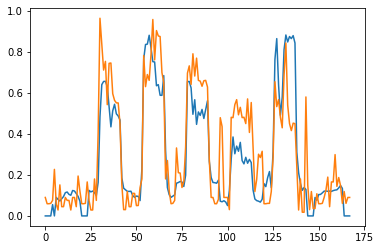

In [ ]:
import matplotlib.pyplot as plt
plt.plot(predResult.squeeze().asnumpy().reshape(-1,1))
plt.plot(testYDt.reshape(-1,1))

In [ ]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

true_values= testYDt.reshape(-1,1)
p50_list=predResult.squeeze().asnumpy().reshape(-1,1)
print(f"MAE: {mean_absolute_error(true_values, p50_list)}, RMSE: {mean_squared_error(true_values, p50_list) ** 0.5}, MAPE: {mean_absolute_percentage_error(true_values, p50_list)}")
print( "The accuracy of the model is: %f" %r2_score(true_values, p50_list))

MAE: 0.1155943724304615, RMSE: 0.15585666039709842, MAPE: 0.7463404206509148
The accuracy of the model is: 0.667262
